<a href="https://colab.research.google.com/github/TranDangKhoi-20146356/AI/blob/main/FLower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [164]:

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
     

In [165]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/trí tuệ nhân tạo/flowers/flower train',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 6246 images belonging to 5 classes.


In [166]:

training_set.class_indices

{'daisy': 0, 'lotus': 1, 'rose': 2, 'sunflower': 3, 'water_lily': 4}

In [167]:
#Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_76 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_77 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                

In [168]:
train=model.fit(training_set,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
196/196 [==============================] - 85s 411ms/step - loss: 1.1342 - accuracy: 0.5423
Epoch 2/10
196/196 [==============================] - 90s 461ms/step - loss: 0.8491 - accuracy: 0.6768
Epoch 3/10
196/196 [==============================] - 80s 411ms/step - loss: 0.6978 - accuracy: 0.7440
Epoch 4/10
196/196 [==============================] - 79s 402ms/step - loss: 0.6041 - accuracy: 0.7738
Epoch 5/10
196/196 [==============================] - 80s 405ms/step - loss: 0.5324 - accuracy: 0.7978
Epoch 6/10
196/196 [==============================] - 80s 407ms/step - loss: 0.4579 - accuracy: 0.8303
Epoch 7/10
196/196 [==============================] - 80s 406ms/step - loss: 0.3860 - accuracy: 0.8549
Epoch 8/10
196/196 [==============================] - 79s 404ms/step - loss: 0.3374 - accuracy: 0.8777
Epoch 9/10
196/196 [==============================] - 79s 404ms/step - loss: 0.2992 - accuracy: 0.8918
Epoch 10/10
196/196 [==============================] - 79s 403ms/step - l

In [169]:

# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.2673344016075134
Train Accuracy 0.9042587280273438


In [176]:
# Lưu 
model.save("/content/drive/MyDrive/trí tuệ nhân tạo/flowers/flower test//flower_photos/test.h5")

In [177]:

model_1=load_model('/content/drive/MyDrive/trí tuệ nhân tạo/flowers/flower test//flower_photos/test.h5')

1/1 [==============================] - 0s 79ms/step
daisy


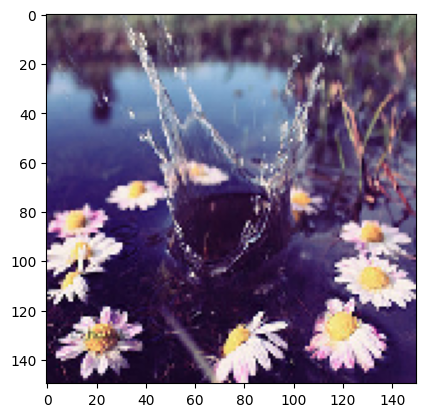

1/1 [==============================] - 0s 20ms/step
daisy


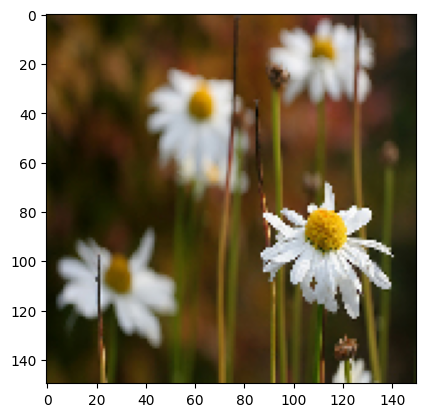

1/1 [==============================] - 0s 26ms/step
daisy


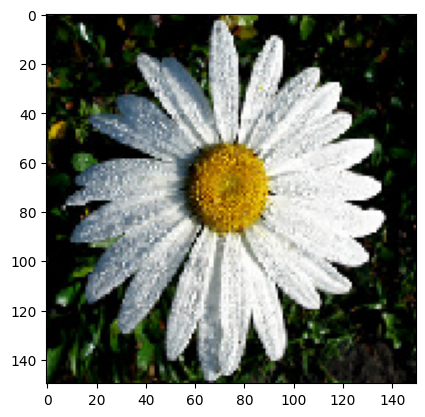

1/1 [==============================] - 0s 30ms/step
daisy


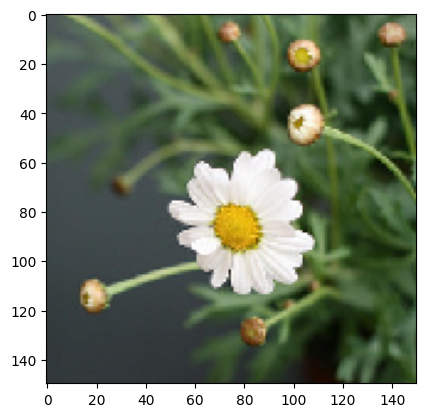

1/1 [==============================] - 0s 37ms/step
daisy


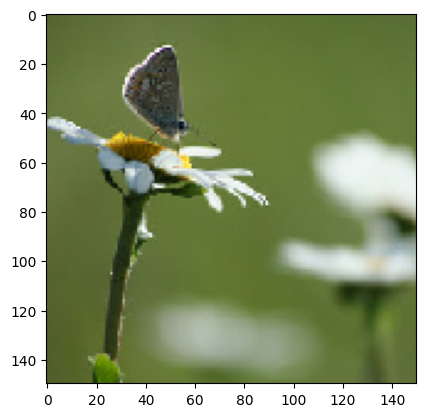

1/1 [==============================] - 0s 29ms/step
daisy


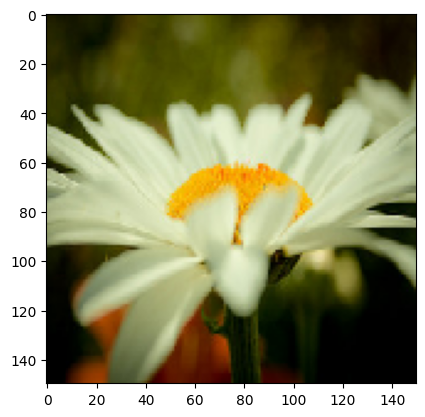

1/1 [==============================] - 0s 38ms/step
daisy


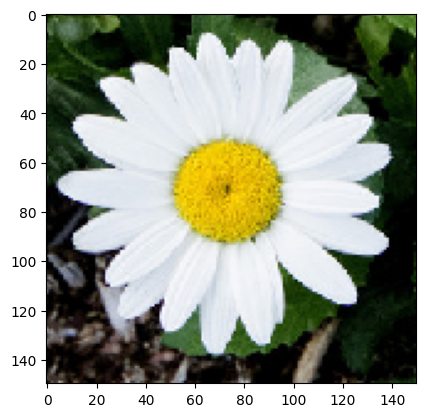

1/1 [==============================] - 0s 31ms/step
daisy


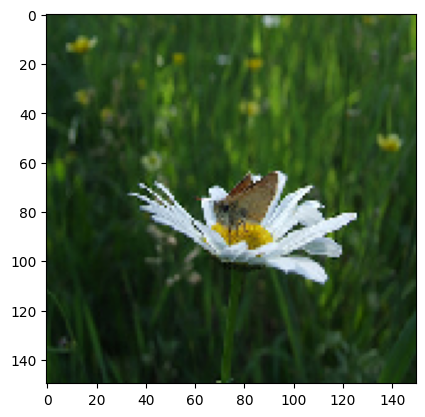

1/1 [==============================] - 0s 26ms/step
daisy


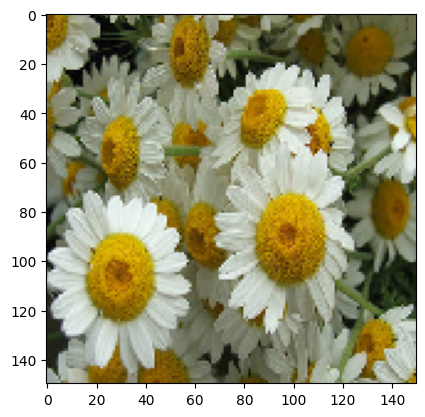

1/1 [==============================] - 0s 27ms/step
daisy


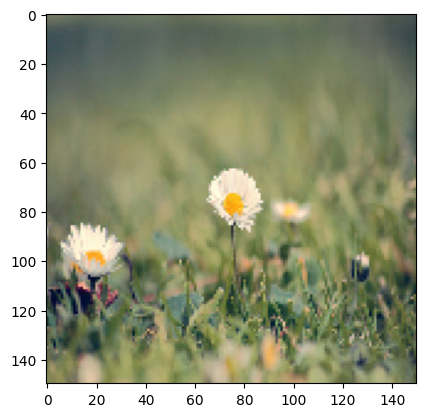

1/1 [==============================] - 0s 44ms/step
rose


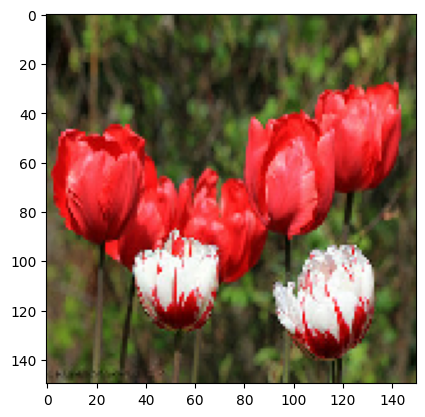

1/1 [==============================] - 0s 21ms/step
rose


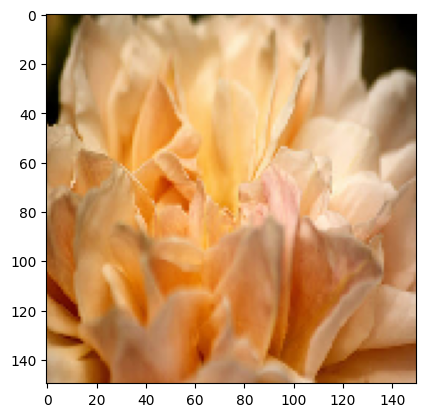

1/1 [==============================] - 0s 25ms/step
water_lily


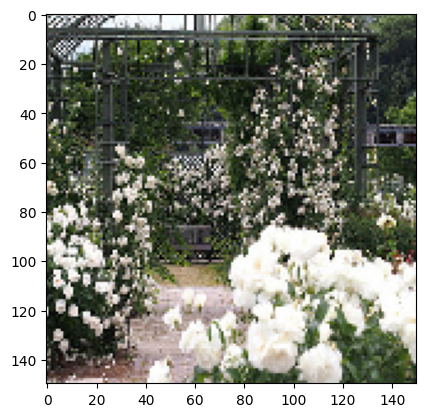

1/1 [==============================] - 0s 26ms/step
lotus


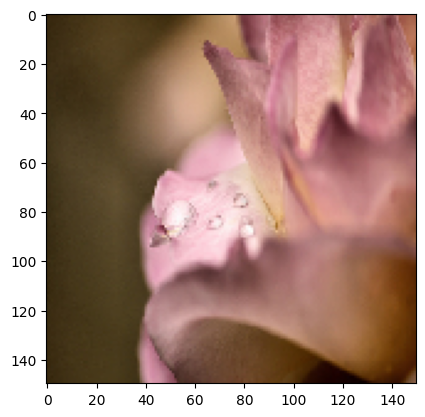

1/1 [==============================] - 0s 25ms/step
rose


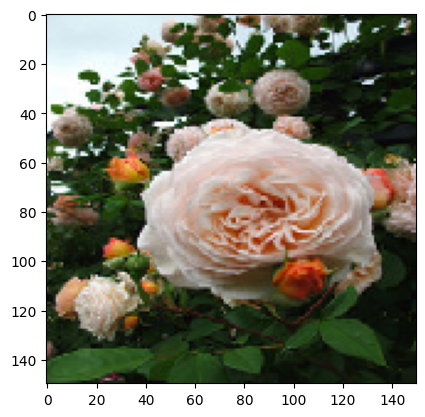

1/1 [==============================] - 0s 21ms/step
daisy


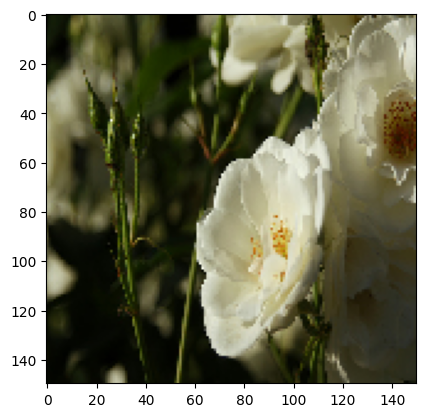

1/1 [==============================] - 0s 18ms/step
rose


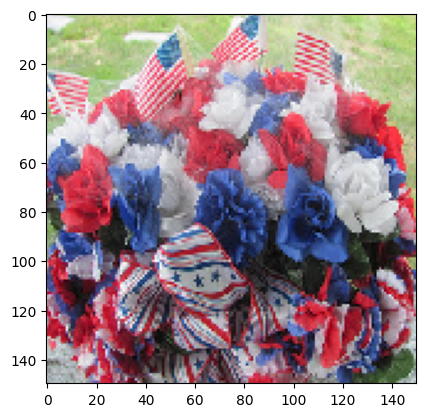

1/1 [==============================] - 0s 18ms/step
rose


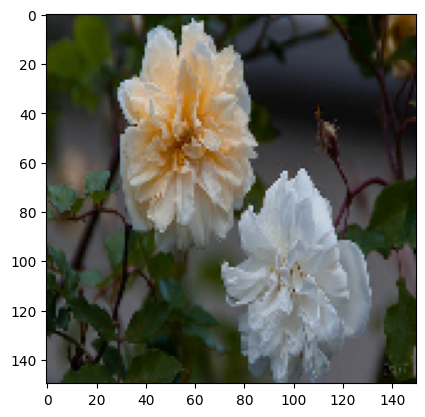

In [179]:
folder="/content/drive/MyDrive/trí tuệ nhân tạo/flowers/flower test/flower_photos/test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['daisy', 'lotus', 'rose', 'Sunflower', 'water_lily']
  print(class_name[result])
  plt.show()